Data manipulation

In [21]:
import pandas as pd
import numpy as np
import nltk

In [22]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

Plotting

In [23]:
import matplotlib.pyplot as plt

In [24]:
def main() -> None:
    #Loading dataset
    df = pd.read_csv("dataset.csv", delimiter=',')

    #Building up data for plotting
    categories = df["CATEGORY"].unique()
    data = {}
    for category in categories:
        data[category] = 0
    for cat in df["CATEGORY"]:
        data[cat] += 1

    #Getting dataset composition
    names = list(data.keys())
    values = list(data.values())
    
    #Plotting dataset composition
    print(names)
    
    plt.bar(names[0], values[0], color="blue", label=names[0])
    plt.bar(names[1], values[1], color="red", label=names[1])
    plt.bar(names[2], values[2], color="black", label=names[2])
    plt.bar(names[3], values[3], color="green", label=names[3])
    plt.bar(names[4], values[4], color="yellow", label=names[4])
    plt.bar(names[5], values[5], color="orange", label=names[5])
    plt.xlabel("Categories")
    plt.ylabel("Size")
    plt.title("Dataset composition")
    plt.legend()
    plt.grid()
    plt.show()

    #Special characted cleaning
    df["F_CONTENT"] = df["F_CONTENT"].str.replace("'s", "")
    df["F_CONTENT"] = df["F_CONTENT"].str.replace("’s", "")
    df["F_CONTENT"] = df["F_CONTENT"].str.strip().str.lower().str.replace('"','')
    for punct_sign in list("?:!.,;'’"):
        df["F_CONTENT"] = df["F_CONTENT"].str.replace(punct_sign, ' ')
    
    nltk.download('punkt')
    nltk.download('wordnet')

    #Lemmatization
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized_text_list = []
    for row in range(len(df)):
        lemmatized_list = []
        text = df.loc[row]["F_CONTENT"]
        text_words = text.split(" ")
        for word in text_words:
            lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
        lemmatized_text_list.append(" ".join(lemmatized_list))
    df["F_CONTENT"] = lemmatized_text_list
   
    #Stopwords
    nltk.download('stopwords')
    stop_words = list(stopwords.words('english'))
    for stop_word in stop_words:
        regex_stopword = r"\b" + stop_word + r"\b"
        df["F_CONTENT"] = df["F_CONTENT"].str.replace(regex_stopword, '')
    print(df.head())

['Artworks', 'Festivities', 'History', 'OnThisDay', 'Promotions', 'VIP_CIT']


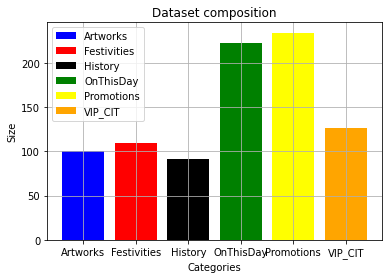

/tmp/ipykernel_69439/912142570.py:38: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["F_CONTENT"] = df["F_CONTENT"].str.replace(punct_sign, ' ')
[nltk_data] Downloading package punkt to /home/enrico/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/enrico/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/enrico/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipykernel_69439/912142570.py:61: FutureWarning: The default value of regex will change from True to False in a future version.
  df["F_CONTENT"] = df["F_CONTENT"].str.replace(regex_stopword, '')


   Unnamed: 0           F_NAME  \
0           0  Artworks-39.txt   
1           1  Artworks-60.txt   
2           2  Artworks-55.txt   
3           3  Artworks-96.txt   
4           4  Artworks-24.txt   

                                           F_CONTENT  CATEGORY  
0   door   first major work  art   islamic cultur...  Artworks  
1    one    elaborate  detail draw  italian renai...  Artworks  
2  get close   artist masterpieces   #rodinexhibi...  Artworks  
3   maya stone lintel depict lord shield jaguar  ...  Artworks  
4   japan   god  wealth  often show   golden mall...  Artworks  


In [25]:
if __name__ == "__main__":
    main()